In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

<br>

- read the data

In [2]:
data=pd.read_csv("/content/heart.csv")

<br>

- showing the first 5 rows

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<br>

- knowing the basic statistic info about the data

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<br>

- to know the shape of the data

In [5]:
data.shape

(1025, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
data.isnull().sum()
#so there is no null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.target.value_counts()

1    526
0    499
Name: target, dtype: int64

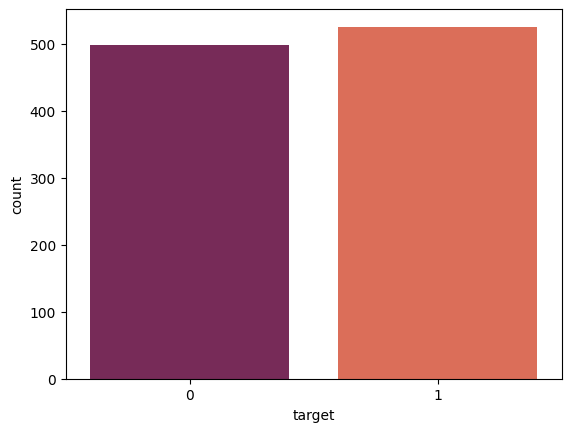

In [9]:
sns.countplot(x="target", data=data, palette="rocket")
plt.show()

In [10]:
labels=["Healthy","Heart Disease"]
fig = px.pie(values=data['target'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","red"]
             ,title="Healthy vs Heart Disease")
fig.show()

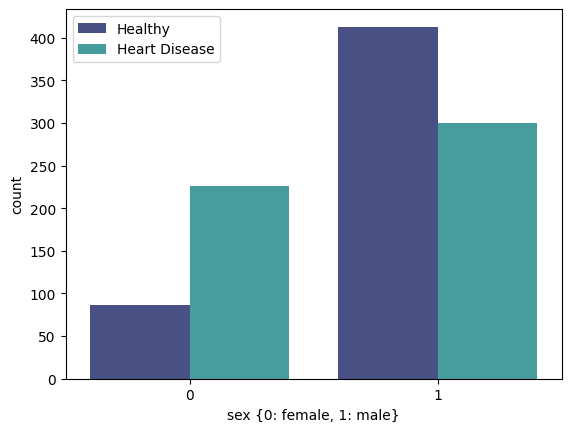

In [11]:
p=sns.countplot(x='sex',data=data, hue='target', palette="mako")
p.set(xlabel="sex {0: female, 1: male}",ylabel="count")
plt.legend(["Healthy", "Heart Disease"])
plt.show()

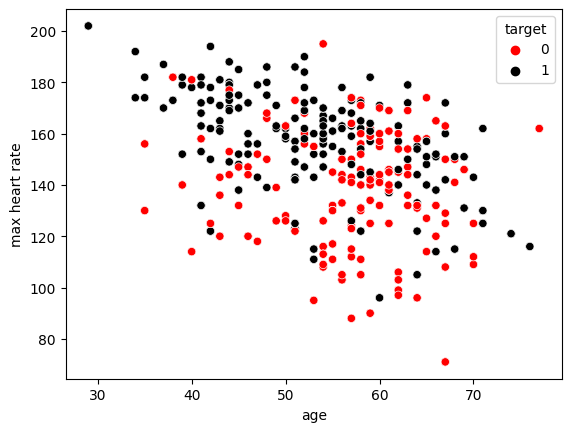

In [12]:
hue_colors={1:"black",0:"red"}
g=sns.scatterplot(x="age",y="thalach",data=data,hue="target",palette=hue_colors)
g.set(xlabel="age",ylabel="max heart rate")
plt.show()

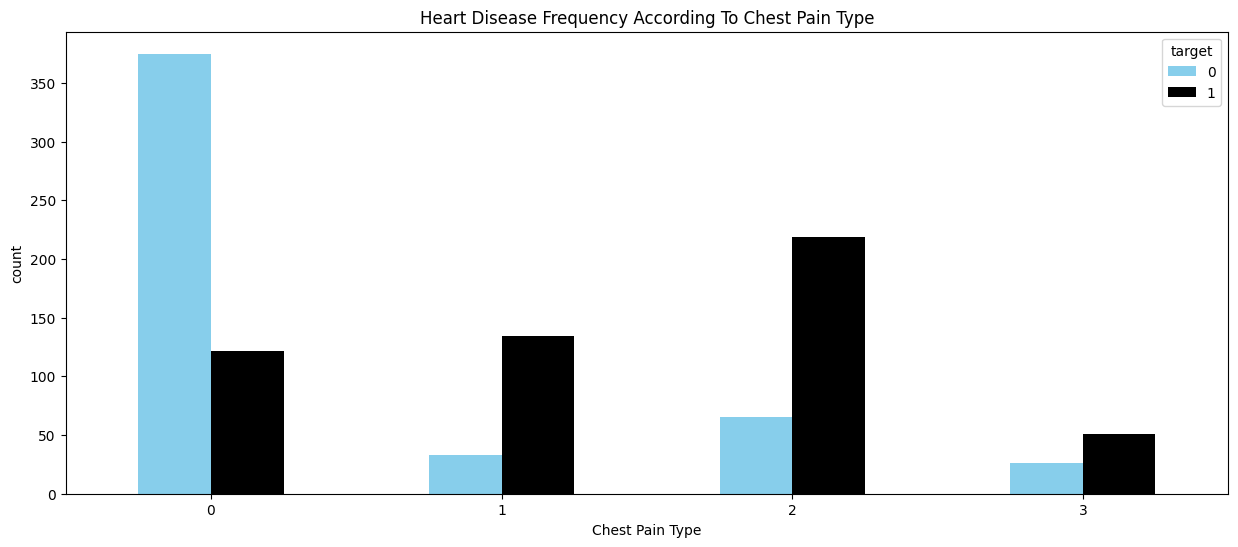

In [13]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(15,6),color=['skyblue','black' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.show()

In [14]:
#selecting x and y of data..
y = data.target
x = data.drop(['target'], axis = 1)

In [15]:
#select 70% of data for train and 30% for test..
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

In [16]:
print('Training Data Shape:', x_train.shape)
print('Testing Data Shape: ', x_test.shape)

Training Data Shape: (717, 13)
Testing Data Shape:  (308, 13)


In [17]:
acc = {}

# ***Logistic regression classifier***

In [18]:
lr=LogisticRegression(solver='lbfgs')
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [19]:
predictions = lr.predict(x_test)
print(metrics.confusion_matrix(y_test,predictions))

[[121  38]
 [ 20 129]]


In [20]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81       159
           1       0.77      0.87      0.82       149

    accuracy                           0.81       308
   macro avg       0.82      0.81      0.81       308
weighted avg       0.82      0.81      0.81       308



In [21]:
metrics.accuracy_score(y_test,predictions)

0.8116883116883117

In [22]:
acc['Logistic regression']=metrics.accuracy_score(y_test,predictions)*100

# ***Naive Bayes classifier***

In [23]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [24]:
predictions = nb.predict(x_test)
print(metrics.confusion_matrix(y_test,predictions))

[[112  47]
 [ 45 104]]


In [25]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71       159
           1       0.69      0.70      0.69       149

    accuracy                           0.70       308
   macro avg       0.70      0.70      0.70       308
weighted avg       0.70      0.70      0.70       308



In [26]:
print(metrics.accuracy_score(y_test,predictions))

0.7012987012987013


In [27]:
acc['Naive Bayes']=metrics.accuracy_score(y_test,predictions)*100

# ***SVM classifier (support vector machine)***

In [28]:
svc = SVC(gamma=0.01)
svc.fit(x_train,y_train)

SVC(gamma=0.01)

In [29]:
predictions = svc.predict(x_test)

print(metrics.confusion_matrix(y_test,predictions))
print(metrics.classification_report(y_test,predictions))

[[153   6]
 [  5 144]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       159
           1       0.96      0.97      0.96       149

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308



In [30]:
print(metrics.accuracy_score(y_test,predictions))

0.9642857142857143


In [31]:
acc['SVM']=metrics.accuracy_score(y_test,predictions)*100

# *****KNN classifier*****

In [32]:
knn = KNeighborsClassifier(n_neighbors = 2)  
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)

In [33]:
print(metrics.confusion_matrix(y_test,predictions))
print(metrics.classification_report(y_test,predictions))

[[159   0]
 [ 17 132]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       159
           1       1.00      0.89      0.94       149

    accuracy                           0.94       308
   macro avg       0.95      0.94      0.94       308
weighted avg       0.95      0.94      0.94       308



In [34]:
print(metrics.accuracy_score(y_test,predictions))

0.9448051948051948


In [35]:
acc['KNN']=metrics.accuracy_score(y_test,predictions)*100

# ***Random Forest classifier***

In [36]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 2)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=2)

In [37]:
predictions = rf.predict(x_test)

In [38]:
print(metrics.confusion_matrix(y_test,predictions))
print(metrics.classification_report(y_test,predictions))

[[159   0]
 [  6 143]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



In [39]:
print(metrics.accuracy_score(y_test,predictions))

0.9805194805194806


In [40]:
acc['Random Forest']=metrics.accuracy_score(y_test,predictions)*100


In [41]:
acc

{'Logistic regression': 81.16883116883116,
 'Naive Bayes': 70.12987012987013,
 'SVM': 96.42857142857143,
 'KNN': 94.48051948051948,
 'Random Forest': 98.05194805194806}

# ***comparing between accuracies***

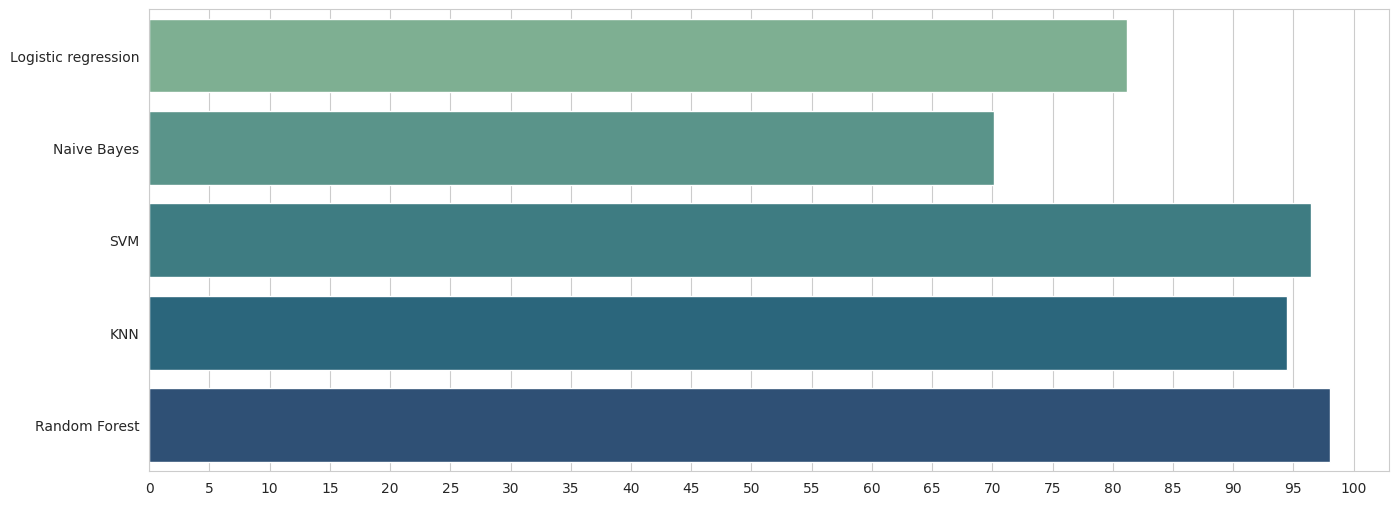

In [42]:
plt.figure(figsize=(16,6))
sns.set_style("whitegrid")
plt.xticks(np.arange(0,105,5))
sns.barplot(y=list(acc.keys()),x=list(acc.values()),palette='crest')
plt.show()